In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def read_clean_transpose_describe(file_path):
    """
    Reads a CSV file, cleans it by dropping rows with NaN values, transposes it, and provides a statistical summary.

    :param file_path: The path to the CSV file.
    :return: A tuple containing the cleaned DataFrame, its transposed version, and its statistical summary.
    """
    try:
        # Read the CSV file into a DataFrame
        data = pd.read_csv(file_path)
    
        # Remove rows with NaN values from the DataFrame
        data_cleaned = data.dropna()
    
        # Transpose the cleaned DataFrame
        data_transposed = data_cleaned.transpose()

        # Provide a statistical summary of the cleaned data
        data_description = data_cleaned.describe()
    
        return data_cleaned, data_transposed, data_description
    except Exception as e:
        return f"An error occurred: {e}"

file_path = "C:/Users/user/Downloads/agriculture_data.csv"   
data_cleaned, data_transposed, data_description = read_clean_transpose_describe(file_path)

print("Cleaned Data:")
print(data_cleaned.head())  

print("\nTransposed Data:")
print(data_transposed.head())  

print("\nData Description:")
print(data_description)


Cleaned Data:
           Indicator    Country Name        1990        1994        1998  \
0  Population, total     Afghanistan  10694796.0  15455555.0  18493132.0   
1  Population, total         Albania   3286542.0   3207536.0   3128530.0   
2  Population, total         Algeria  25518074.0  27937006.0  29924668.0   
3  Population, total  American Samoa     47818.0     52288.0     56603.0   
4  Population, total         Andorra     53569.0     61037.0     65186.0   

         2002        2006        2010        2014        2018        2021  \
0  21000256.0  25442944.0  28189672.0  32716210.0  36686784.0  40099462.0   
1   3051010.0   2992547.0   2913021.0   2889104.0   2866376.0   2811666.0   
2  31624696.0  33435080.0  35856344.0  38760168.0  41927007.0  44177969.0   
3     58177.0     56837.0     54849.0     52217.0     48424.0     45035.0   
4     70849.0     80221.0     71519.0     71621.0     75013.0     79034.0   

         2022  
0  41128771.0  
1   2775634.0  
2  44903225.0  
3 

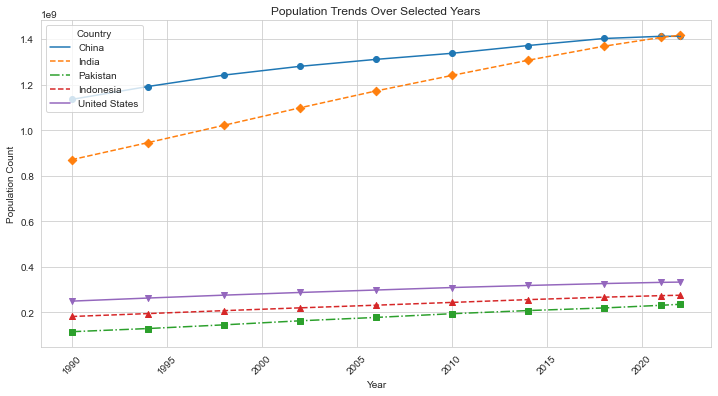

In [3]:
def plot_population_trends(df, country_list, indicator, year_range):
    """
    Generates a line plot showing population trends for chosen countries over selected years.

    :param df: DataFrame containing the data
    :param country_list: List of countries to include in the plot
    :param indicator: Indicator to be plotted
    :param year_range: List of years to include in the plot
    """
    # Preparing the data for plotting
    df = df[df['Indicator'].isin(indicator) & df['Country Name'].isin(country_list)]
    df = df[df['Year'].isin(year_range)]

    line_styles = {'China': '-', 'India': '--', 'Pakistan': '-.', 'Indonesia': '--', 'United States': '-'}
    marker_styles = {'China': 'o', 'India': 'D', 'Pakistan': 's', 'Indonesia': '^', 'United States': 'v'}

    # Set Seaborn style to white background
    sns.set_style("whitegrid")

    # Create a figure and axis
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    # Iterate through countries and plot lines and markers separately
    for country in country_list:
        country_data = df[df['Country Name'] == country]

        # Plot lines with specified style
        line_style = line_styles.get(country, '-')
        ax.plot(country_data['Year'], country_data['Value'], label=country, linestyle=line_style)

        # Plot markers with specified style
        marker_style = marker_styles.get(country, 'o')
        ax.scatter(country_data['Year'], country_data['Value'], label='', marker=marker_style)

    # Customize the plot
    plt.title('Population Trends Over Selected Years')
    plt.xlabel('Year')
    plt.ylabel('Population Count')
    plt.xticks(rotation=45)
    plt.legend(title="Country", loc="upper left")
    plt.grid(True)

    plt.show()

data_melted = data_cleaned.melt(id_vars=['Indicator', 'Country Name'], var_name='Year', value_name='Value')
data_melted['Year'] = data_melted['Year'].astype(int)  # Converting year to integer

particular_indicator = ["Population, total"]
various_countries = ['China', 'India', 'Pakistan', 'Indonesia', 'United States']
years_list = [1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2021, 2022]

plot_population_trends(data_melted, various_countries, particular_indicator, years_list)


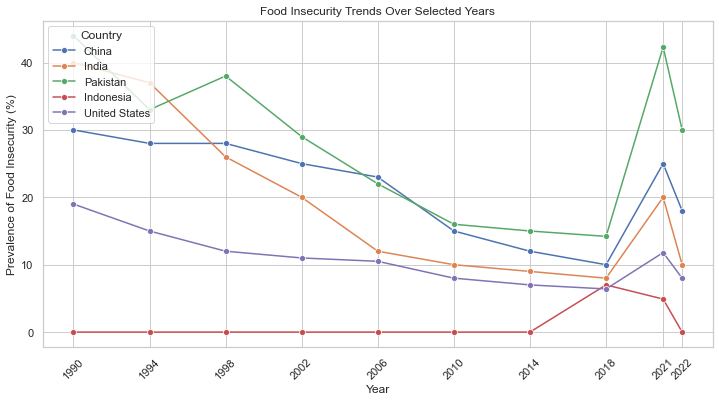

In [4]:
def plot_food_insecurity_trends(df, country_list, indicator, year_range, line_style='-', marker_style='o'):
    """
    Generates a line plot showing food insecurity trends for chosen countries over selected years.

    :param df: DataFrame containing the data
    :param country_list: List of countries to include in the plot
    :param indicator: Indicator to be plotted
    :param year_range: List of years to include in the plot
    :param line_style: Line style for the plot
    :param marker_style: Marker style for the plot
    """
    # Preparing the data for plotting
    df = df[df['Indicator'].isin(indicator) & df['Country Name'].isin(country_list)]
    df = df[df['Year'].isin(year_range)]

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")

    for country in country_list:
        country_data = df[df['Country Name'] == country]

        sns.lineplot(data=country_data, x='Year', y='Value', label=country, linestyle=line_style, marker=marker_style)

    plt.title('Food Insecurity Trends Over Selected Years')
    plt.xlabel('Year')
    plt.ylabel('Prevalence of Food Insecurity (%)')
    plt.legend(title="Country", loc="upper left")
    plt.xticks(year_range, rotation=45)
    plt.show()

# Call the new function to plot food insecurity trends
particular_indicator_food = ["Prevalence of moderate or severe food insecurity in the population (%)"]
various_countries_food = ['China', 'India', 'Pakistan', 'Indonesia', 'United States']

plot_food_insecurity_trends(data_melted, various_countries_food, particular_indicator_food, years_list)

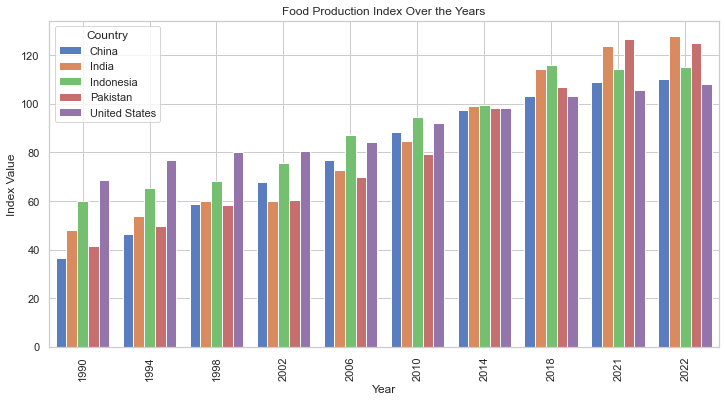

In [5]:
def plot_food_production_index(df, country_list, indicators, year_list):
    """
    Plots the food production index as a bar plot for selected countries and years.

    :param df: DataFrame containing the data
    :param country_list: List of countries to include in the plot
    :param indicators: List of indicators to include in the plot
    :param year_list: List of years to include in the plot
    """
    # Selecting and filtering the data
    filtered_df = df[df['Country Name'].isin(country_list) & df['Indicator'].isin(indicators)]
    filtered_df = filtered_df[filtered_df['Year'].isin(year_list)]

    # Creating the main bar plot
    plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")
    sns.barplot(x='Year', y='Value', hue='Country Name', data=filtered_df, palette='muted')

    plt.title('Food Production Index Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Index Value')
    plt.xticks(rotation=90)
    plt.legend(title='Country', loc='upper left')
    plt.grid(True)

    plt.show()

# Call the new function to plot food production index

particular_indicators_food = ["Food production index (2014-2016 = 100)"]
various_countries_food = ['China', 'India', 'Pakistan', 'Indonesia', 'United States']
years = [1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2021, 2022]

plot_food_production_index(data_melted, various_countries_food, particular_indicators_food, years)

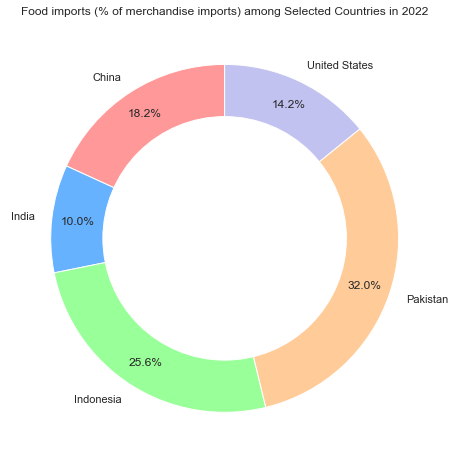

In [6]:
def visualize_indicator_distribution(df, country_list, indicator_name, target_year):
    """
    Generates a donut chart showing the distribution of a specific indicator among selected countries for a given year.

    :param df: DataFrame containing the data
    :param country_list: Countries to be included in the chart
    :param indicator_name: Indicator to be visualized
    :param target_year: Year for which the data is visualized
    """
    # Selecting and preparing data
    filtered_df = df[(df['Country Name'].isin(country_list)) & (df['Indicator'] == indicator_name)]
    year_data = filtered_df[['Country Name', str(target_year)]].dropna()

    # Define custom colors
    custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0']

    # Creating the outer pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(year_data[str(target_year)], labels=year_data['Country Name'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'), colors=custom_colors)
    center_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Adding title
    plt.title(f'{indicator_name} among Selected Countries in {target_year}')

    plt.show()

# Set Seaborn style
sns.set_style("whitegrid")

particular_indicator = 'Food imports (% of merchandise imports)'
various_countries = ['China', 'India', 'Pakistan', 'Indonesia', 'United States']
year = 2022

visualize_indicator_distribution(data_cleaned,various_countries,particular_indicator, year)


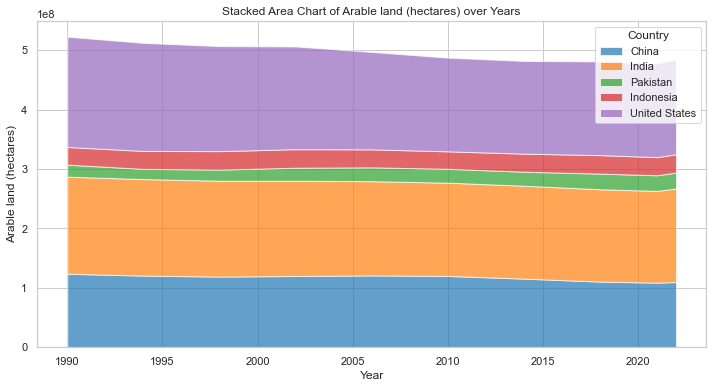

In [7]:
def plot_stacked_area_chart_for_indicator(data, countries, indicator, years):
    """
    Plots a stacked area chart of the specified indicator for selected countries over the specified years.
    
    :param data: DataFrame containing the data
    :param countries: List of countries to include in the chart
    :param indicator: The indicator to plot
    :param years: List of years to include in the chart
    """
    # Filter data for selected countries and indicator
    data_filtered = data[(data['Country Name'].isin(countries)) & (data['Indicator'] == indicator)]
    
    # Melt the data for plotting
    data_melted = data_filtered.melt(id_vars=['Country Name', 'Indicator'], var_name='Years', value_name='Value')
    
    # Convert the "Years" column to integer
    data_melted['Years'] = pd.to_numeric(data_melted['Years'], errors='coerce')
    
    # Filter data for the specified years
    data_melted = data_melted[data_melted['Years'].isin(years)]

    # Pivot the data for a stacked area chart
    data_pivot = data_melted.pivot(index='Years', columns='Country Name', values='Value').fillna(0)
    
    # Define a colorful palette ("tab10" palette)
    palette = sns.color_palette("tab10", len(countries))

    # Plotting the stacked area chart
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    plt.stackplot(data_pivot.index, data_pivot.values.T, labels=countries, colors=palette, alpha=0.7)
    
    plt.title(f'Stacked Area Chart of {indicator} over Years')
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.legend(title='Country')
    plt.grid(True)
    plt.show()

number_of_countries = ['China', 'India', 'Pakistan', 'Indonesia', 'United States']
particular_indicator = 'Arable land (hectares)'
years = [1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2021, 2022]

plot_stacked_area_chart_for_indicator(data_cleaned, number_of_countries, particular_indicator, years)


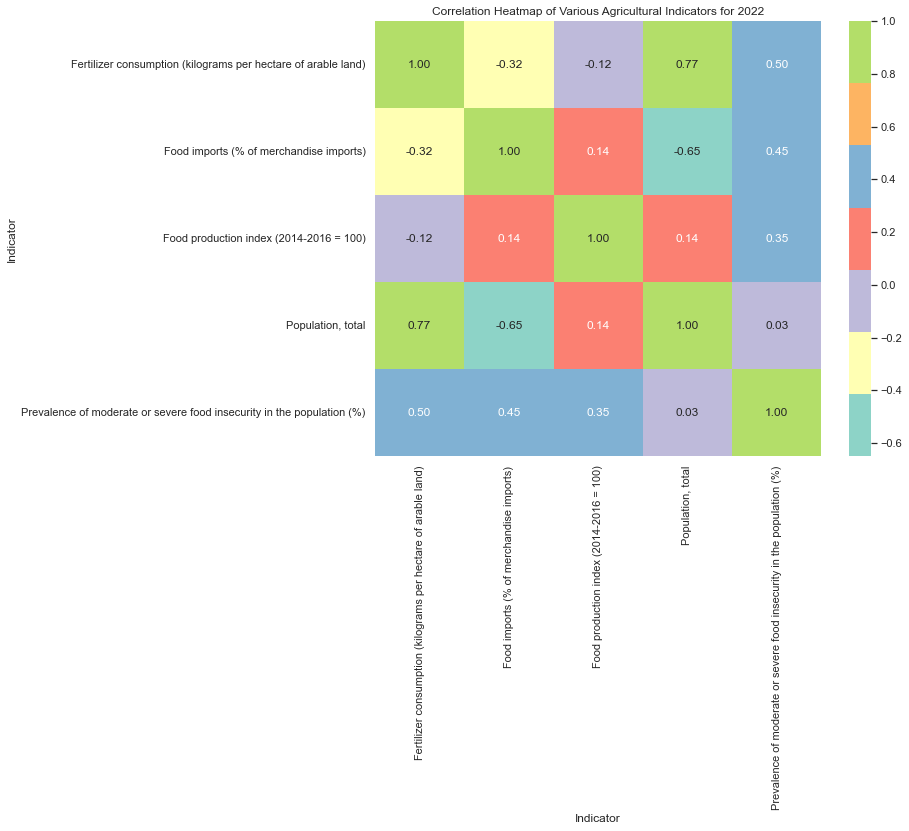

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(data, countries, indicators, year):
    """
    Plots a correlation heatmap of various agricultural indicators for a specific year and selected countries.
    
    :param data: DataFrame containing the data
    :param countries: List of countries to include in the correlation analysis
    :param indicators: List of indicators to include in the correlation analysis
    :param year: The year for which the correlation is calculated
    """
    # Filter data for selected countries, indicators, and year
    data_filtered = data[(data['Country Name'].isin(countries)) & (data['Indicator'].isin(indicators))]

    # Extract values for the specified year and pivot the table for correlation analysis
    data_for_year = data_filtered.pivot_table(index='Country Name', columns='Indicator', values=str(year))

    correlation_matrix = data_for_year.corr()

    custom_palette = sns.color_palette("Set3", n_colors=len(indicators))

    sns.set_style("whitegrid")

    # Plotting the heatmap with custom palette and style
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f")
    plt.title(f'Correlation Heatmap of Various Agricultural Indicators for {year}')
    plt.show()

# Indicators for analysis
various_indicators = [
    'Population, total',
    'Prevalence of moderate or severe food insecurity in the population (%)',
    'Food production index (2014-2016 = 100)',
    'Food imports (% of merchandise imports)',
    'Food exports (% of merchandise imports)',
    'Arable land (% of land area)',
    'Fertilizer consumption (kilograms per hectare of arable land)'
]

# Example usage 
number_of_countries = ['China', 'India', 'Pakistan', 'Indonesia', 'United States']
analysis_year = 2022

plot_correlation_heatmap(data_cleaned, number_of_countries, various_indicators, analysis_year)


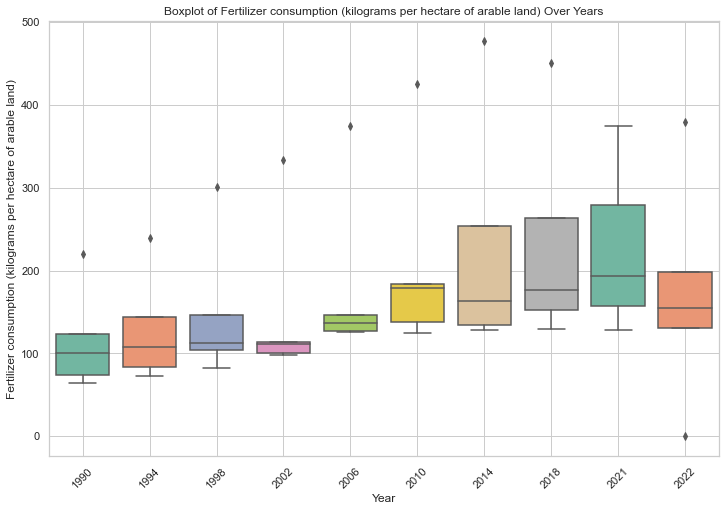

In [9]:
def plot_boxplot_for_indicator(data, countries, indicator, years):
    """
    Plots a boxplot for a specific indicator over the years for selected countries.

    :param data: DataFrame containing the data
    :param countries: List of countries to include in the plot
    :param indicator: The indicator to plot
    :param years: List of years to include in the plot
    """
    # Filter data for selected countries and indicator
    data_filtered = data[(data['Country Name'].isin(countries)) & (data['Indicator'] == indicator)]

    # Create a list to store data for each year
    year_data = []
    
    # Loop through each year and append to year_data
    for year in years:
        if str(year) in data_filtered.columns:
            year_data.append(data_filtered[str(year)])

    # Combine the data into a single DataFrame
    data_to_plot = pd.concat(year_data, axis=1)
    data_to_plot.columns = years

    # Create the boxplot
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    sns.boxplot(data=data_to_plot, palette="Set2")
    plt.title(f'Boxplot of {indicator} Over Years')
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

number_of_countries = ['China', 'India', 'Pakistan', 'Indonesia', 'United States']
particular_indicator = 'Fertilizer consumption (kilograms per hectare of arable land)'
years = [1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2021, 2022]

plot_boxplot_for_indicator(data_cleaned, number_of_countries, particular_indicator, years)


Skewness: -0.4865
Kurtosis: -1.309706


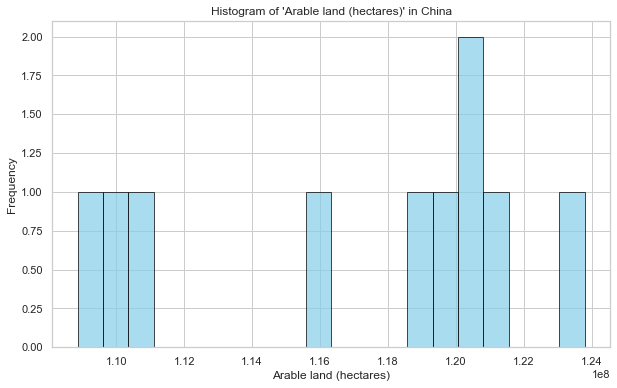

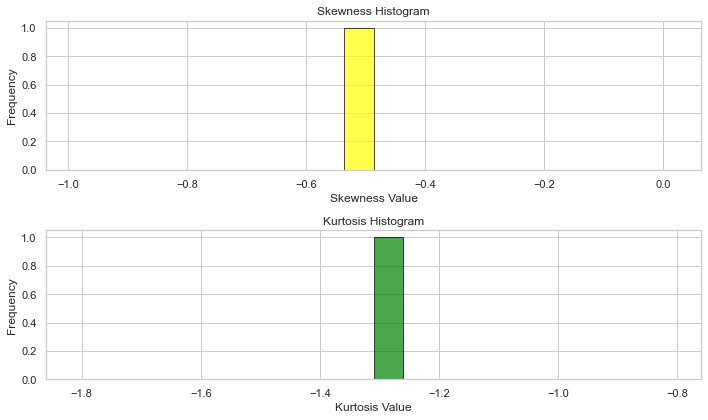

In [11]:
def skewness(data, countries, indicator_name, years):
    """
    Calculates the centralized and normalized skewness of a distribution.

    :param data: DataFrame containing the data
    :param countries: List of countries to include in the calculation
    :param indicator_name: String indicating the indicator to include in the calculation
    :param years: List of years to include in the calculation
    :return: Skewness value rounded to 6 decimal places
    """
    data_filtered = data[(data['Country Name'].isin(countries)) & (data['Indicator'] == indicator_name)][['Country Name'] + years].fillna(0)

    data_prepared = data_filtered.melt(id_vars=['Country Name'], var_name='Year', value_name='Value')
    dist = data_prepared['Value']

    # Calculate average and std. dev. for centralizing and normalizing
    aver = np.mean(dist)
    std = np.std(dist, ddof=0)  # Use ddof=0 for population standard deviation

    # Calculate the skewness
    value = np.sum(((dist - aver) / std) ** 3) / len(dist)
    return np.round(value, 6)

def kurtosis(data, countries, indicator_name, years):
    """
    Calculates the centralized and normalized excess kurtosis of a distribution.

    :param data: DataFrame containing the data
    :param countries: List of countries to include in the calculation
    :param indicator_name: String indicating the indicator to include in the calculation
    :param years: List of years to include in the calculation
    :return: Kurtosis value rounded to 6 decimal places
    """
    data_filtered = data[(data['Country Name'].isin(countries)) & (data['Indicator'] == indicator_name)][['Country Name'] + years].fillna(0)

    # Prepare the DataFrame to make it suitable for calculating kurtosis
    data_prepared = data_filtered.melt(id_vars=['Country Name'], var_name='Year', value_name='Value')
    dist = data_prepared['Value']

    # Calculate average and std. dev. for centralizing and normalizing
    aver = np.mean(dist)
    std = np.std(dist, ddof=0)  # Use ddof=0 for population standard deviation

    # Calculate the kurtosis
    value = np.sum(((dist - aver) / std) ** 4) / len(dist) - 3.0
    return np.round(value, 6)

# Calculate skewness and kurtosis for "Arable land (hectares)" in China
years = ['1990', '1994', '1998', '2002', '2006', '2010', '2014', '2018', '2021', '2022']
for_country = ["China"]
particular_indicator = "Arable land (hectares)"

skew_value = skewness(data_cleaned, for_country, particular_indicator, years)
kurtosis_value = kurtosis(data_cleaned, for_country, particular_indicator, years)

print(f"Skewness: {skew_value}")
print(f"Kurtosis: {kurtosis_value}")


# Filter the data for the selected country and indicator
selected_country = "China"
selected_indicator = "Arable land (hectares)"
data_filtered = data_cleaned[(data_cleaned['Country Name'] == selected_country) & (data_cleaned['Indicator'] == selected_indicator)]

# Extract the values for plotting
values = data_filtered[years].values[0]  # Assuming 'years' is defined as in your previous code

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(values, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f"Histogram of '{selected_indicator}' in {selected_country}")
plt.xlabel(selected_indicator)
plt.ylabel("Frequency")
plt.grid(True)

# Add labels and show the plot
plt.show()

skew_value = -0.4865
kurtosis_value =  -1.309706
# Create a histogram for skewness and kurtosis values
plt.figure(figsize=(10, 6))

# Skewness histogram
plt.subplot(2, 1, 1)
plt.hist(skew_value, bins=20, color='yellow', edgecolor='black', alpha=0.7)
plt.title("Skewness Histogram")
plt.xlabel("Skewness Value")
plt.ylabel("Frequency")

# Kurtosis histogram
plt.subplot(2, 1, 2)
plt.hist(kurtosis_value, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Kurtosis Histogram")
plt.xlabel("Kurtosis Value")
plt.ylabel("Frequency")

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()
